<a href="https://colab.research.google.com/github/divya87681/Vehicle_routing/blob/main/vehicle_routing_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator,tools,algorithms

In [3]:
num_locations = 15
#randomly generate coordinates between 0 ans 100
locations = [(random.randint(0,100),random.randint(0,100))for _ in range(num_locations)]
#define the coordiates for the depot
depot = (50,50)
#display the number of vehicles
num_vehicles = 3
#display the data
print("Depot:",depot)
print("Locations:",locations)
print("Number of vehicles:",num_vehicles)

Depot: (50, 50)
Locations: [(48, 32), (88, 72), (72, 30), (57, 19), (25, 28), (7, 34), (71, 13), (55, 57), (77, 37), (2, 55), (49, 45), (81, 7), (97, 85), (33, 74), (16, 44)]
Number of vehicles: 3


In [4]:
#Genetic Algorithm Setup
# - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness,weights=(-1,0,))
creator.create("Individual", list, Fitness=creator.FitnessMin)

In [5]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual",tools.initRepeat,creator.Individual,toolbox.indices)
toolbox.register("population",tools.initRepeat,list,toolbox.individual)

In [6]:
#TASK 5
import numpy as np
def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = 0
        for k in range(len(vehicle_route) - 1):
            vehicle_distance += distance_matrix[vehicle_route[k]][vehicle_route[k + 1]]
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty
toolbox.register("evaluate", evalVRP)


In [7]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", tools.cxUniform,indpb=0.5)
toolbox.register("mutate", tools.mutShuffleIndexes,indpb=0.2)
toolbox.register("select", tools.selTournament,tournsize=0.5)

<ipython-input-8-463456dd5d25>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", num_vehicles)


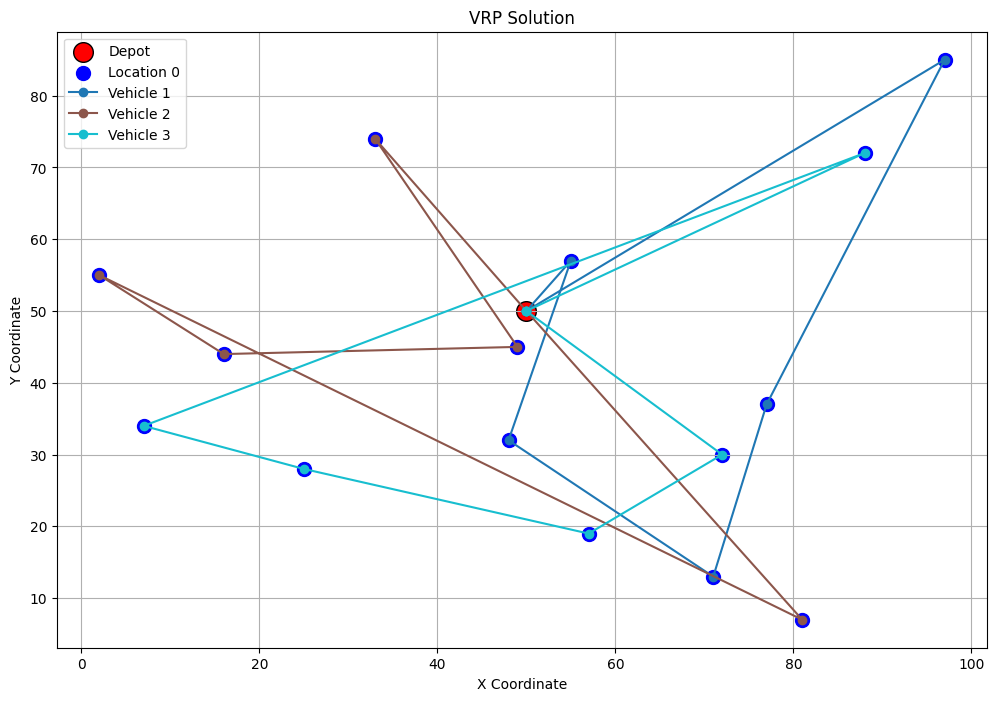

In [8]:
import matplotlib.pyplot as plt

def plot_vrp_solution(individual, locations, depot, num_vehicles, title="VRP Solution"):
    """
    Plots the routes for a VRP solution.

    Args:
        individual: List of indices representing the solution.
        locations: List of (x, y) coordinates for each location.
        depot: (x, y) coordinates of the depot.
        num_vehicles: Number of vehicles.
        title: Title of the plot.
    """
    plt.figure(figsize=(12, 8))

    # Plot depot as a red square
    plt.scatter(depot[0], depot[1], c='red', s=200, edgecolors='black', label='Depot')

    # Plot all locations as blue dots
    for idx, (x, y) in enumerate(locations):
        plt.scatter(x, y, c='blue', s=100, label=f'Location {idx}' if idx == 0 else "")

    # Assign a unique color for each vehicle route
    colors = plt.cm.get_cmap("tab10", num_vehicles)

    for vehicle in range(num_vehicles):
        # Get the route for the current vehicle
        route_indices = [individual[j] for j in range(vehicle, len(individual), num_vehicles)]
        route = [depot] + [locations[i] for i in route_indices] + [depot]

        # Unpack x and y coordinates
        x_coords, y_coords = zip(*route)

        # Plot the route
        plt.plot(x_coords, y_coords, marker='o', label=f'Vehicle {vehicle + 1}', color=colors(vehicle))

    # Customize the plot
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming `individual` is a solution from your genetic algorithm
# Generate a dummy individual for visualization
individual = random.sample(range(len(locations)), len(locations))  # Replace with your GA result

plot_vrp_solution(individual, locations, depot, num_vehicles, title="VRP Solution")
